In [1]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Data Understanding and Cleaning

In [2]:
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_df.shape

(167, 10)

In [4]:
#converting export, import and health percentage value to actual value base on GDP per capita.
country_df['exports']=country_df['exports']*country_df['gdpp']/100
country_df['imports']=country_df['imports']*country_df['gdpp']/100
country_df['health']=country_df['health']*country_df['gdpp']/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [7]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [8]:
#Checking missing values
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Principal Component Analysis

In [9]:
# Dropping the country column
country_df_temp=country_df.drop(['country'],axis=1)

In [10]:
#Applying Standard Scale
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data2 = standard_scaler.fit_transform(country_df_temp)

In [11]:
data2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [12]:
#Import PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [13]:
#Performing the PCA
pca.fit(data2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [14]:
#List of PCA components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [15]:
#checking for variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

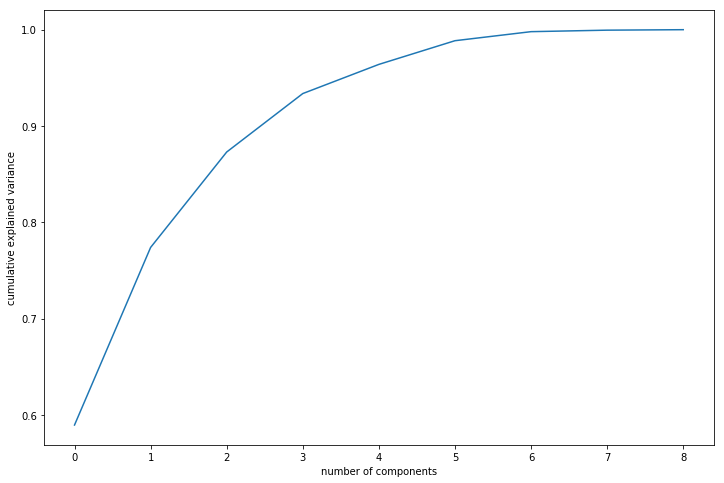

In [16]:
#Plotting the scree plot for cumulative explained variance and number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [17]:
#Around 90% of the information is being explained by first 3 components
colnames = list(country_df_temp.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


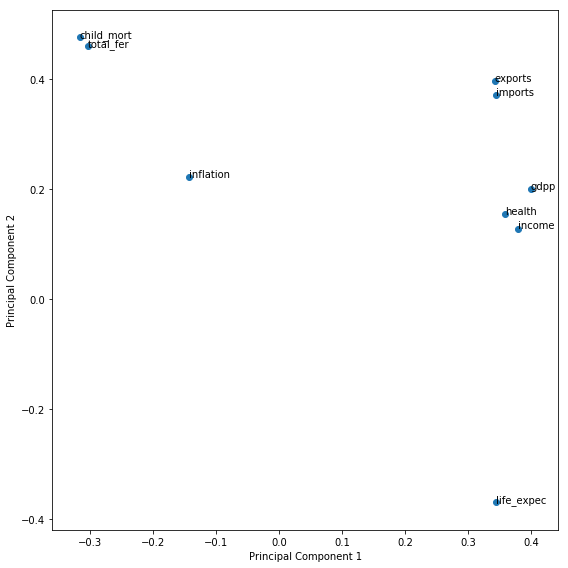

In [18]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [19]:
#Dimenstional reduction using the Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [20]:
df_pca = pca_final.fit_transform(data2)
df_pca.shape

(167, 3)

In [21]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [22]:
#create the new matrix as per PCs
pcs_df2 = pd.DataFrame({'country':list(country_df['country']),'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})

In [23]:
pcs_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


In [24]:
pcs_df2.shape

(167, 4)

## Outliers Treatment

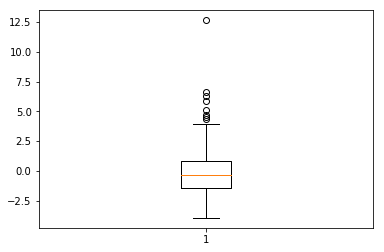

In [25]:
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

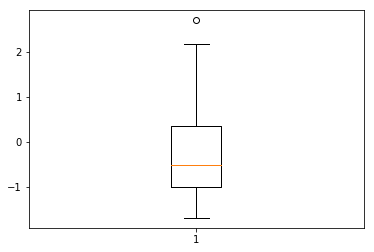

In [26]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

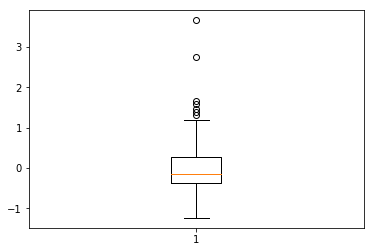

In [27]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

In [28]:
pcs_df2.shape

(119, 4)

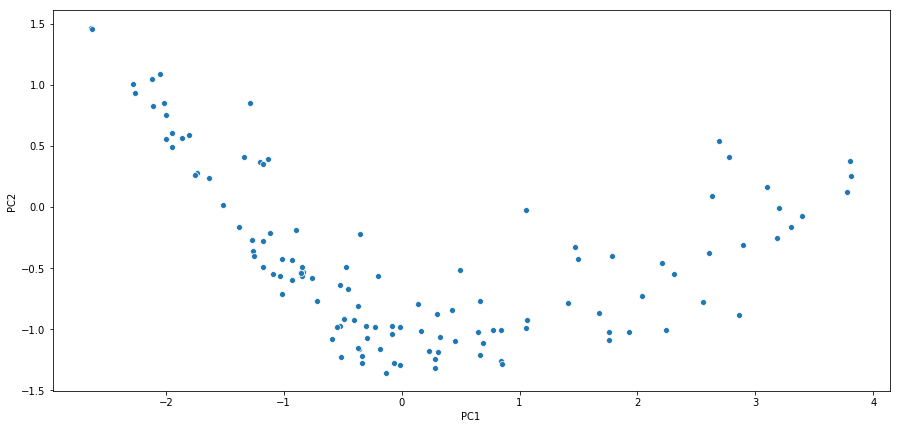

In [29]:
#Plotting the points on the PCs.
plt.figure(figsize = (15,7))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

## Clustering 

In [30]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
#Let's check the Hopkins measure
hopkins(pcs_df2.drop(['country'],axis=1))

0.7060245536219241

In [32]:
#Since the value is > 0.5 we can form better clusters.
data3_1 = pcs_df2.drop(['country'],axis=1)
data3_1.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
2,-0.457626,-0.673301,0.961867
4,0.649849,-1.024374,-0.250103
6,-0.332692,-1.274517,0.176636
7,3.180362,-0.250785,-0.116877


### K- means Clustering

In [33]:
#Silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data3_1)
    sse_.append([k, silhouette_score(data3_1, kmeans.labels_)])

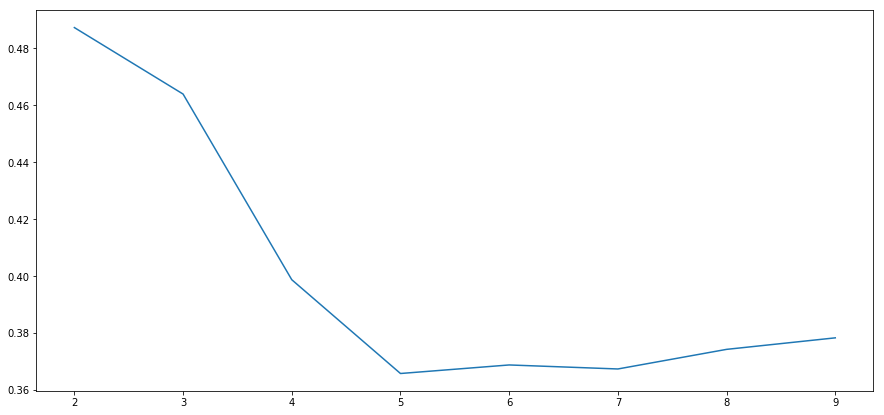

In [34]:
plt.figure(figsize = (15,7))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

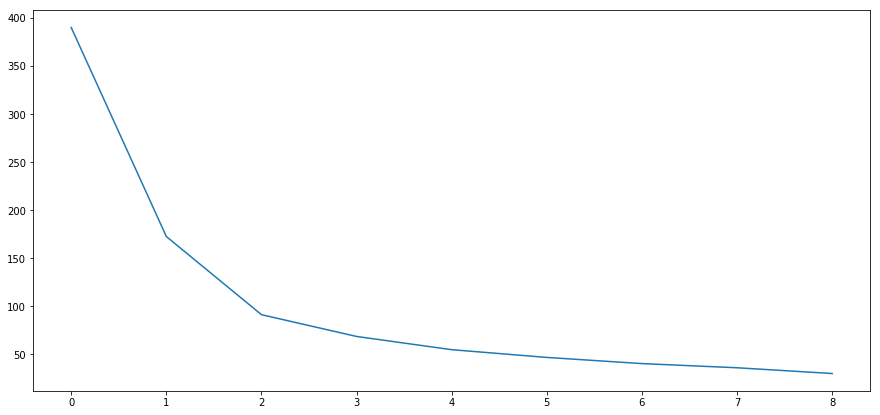

In [35]:
#Elbow curve method
plt.figure(figsize = (15,7))
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(data3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [36]:
#Elbow curve shows a bend at around 2 to 3, so we perform K means using K=3
model_k3 = KMeans(n_clusters = 3, max_iter=50)
model_k3.fit(data3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
data4=pcs_df2
data4.index = pd.RangeIndex(len(data4.index))
data_km = pd.concat([data4, pd.Series(model_k3.labels_)], axis=1)
data_km.columns = ['country','PC1', 'PC2','PC3','ClusterID']

In [38]:
data_km.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,2
1,Algeria,-0.457626,-0.673301,0.961867,0
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0
3,Armenia,-0.332692,-1.274517,0.176636,0
4,Australia,3.180362,-0.250785,-0.116877,1


In [39]:
#checking for the count of in each cluster
data_km['ClusterID'].value_counts()

0    61
2    31
1    27
Name: ClusterID, dtype: int64

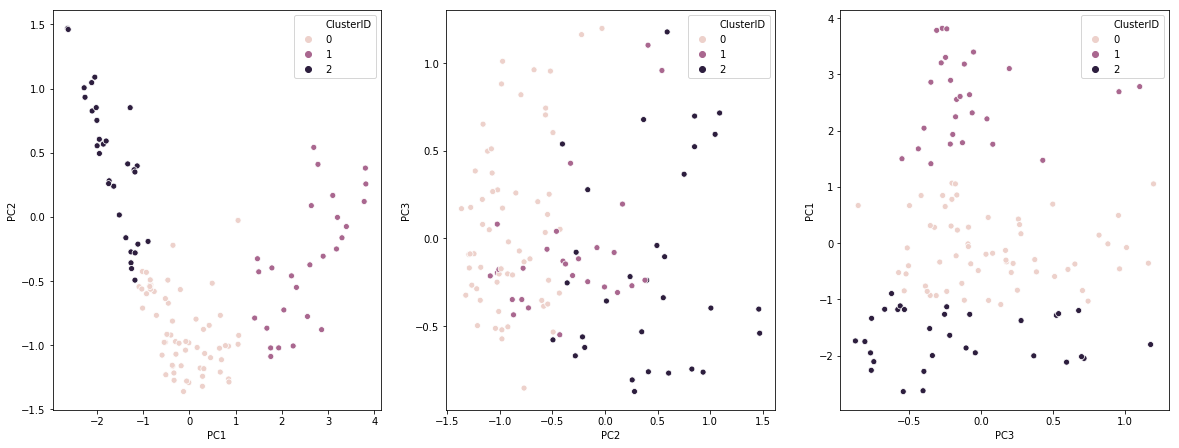

In [45]:
#Plotting the PC values on Scatterplot
plt.figure(figsize=(20, 25))

#plotting the clusters pc1 and pc2
plt.subplot(3,3,1)
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=data_km)

#plotting the clusters pc2 and pc3
plt.subplot(3,3,2)
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=data_km)

#plotting the clusters pc3 and pc1
plt.subplot(3,3,3)
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=data_km)

In [46]:
#Merge the dataset with country and pc values with assign cluster
data5=pd.merge(country_df,data_km,on='country')
data5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,0
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,0
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.332692,-1.274517,0.176636,0
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.180362,-0.250785,-0.116877,1


In [47]:
#Calculating the cluster means wrt to the various variables

data6=data5.drop(['PC1','PC2','PC3'],axis=1)

clus_chi = pd.DataFrame(data6.groupby(["ClusterID"]).child_mort.mean())
clus_exp = pd.DataFrame(data6.groupby(["ClusterID"]).exports.mean())
clus_imp = pd.DataFrame(data6.groupby(["ClusterID"]).imports.mean())
clus_hea = pd.DataFrame(data6.groupby(["ClusterID"]).health.mean())
clus_inc = pd.DataFrame(data6.groupby(["ClusterID"]).income.mean())
clus_inf = pd.DataFrame(data6.groupby(["ClusterID"]).inflation.mean())         
clus_lif = pd.DataFrame(data6.groupby(["ClusterID"]).life_expec.mean())
clus_tot = pd.DataFrame(data6.groupby(["ClusterID"]).total_fer.mean())
clus_gdp = pd.DataFrame(data6.groupby(["ClusterID"]).gdpp.mean())

In [48]:
df = pd.concat([pd.Series([0,1,2]),clus_chi,clus_exp,clus_imp,clus_hea,clus_inc,clus_inf,clus_lif,clus_tot,clus_gdp], axis=1)

In [49]:
df.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income",
              "Inflation","Life_Expectancy","Total_Fertility","GDP"]
df

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDP
0,0,20.221311,3071.619836,3160.474656,406.979256,12796.557377,6.627721,73.208197,2.272295,6636.360656
1,1,5.322222,14504.025926,13650.455556,3249.133704,37170.370370,2.204556,79.777778,1.749259,34696.296296
2,2,63.651613,861.023623,858.977519,128.778690,4450.000000,9.736452,63.329032,4.111935,2072.161290


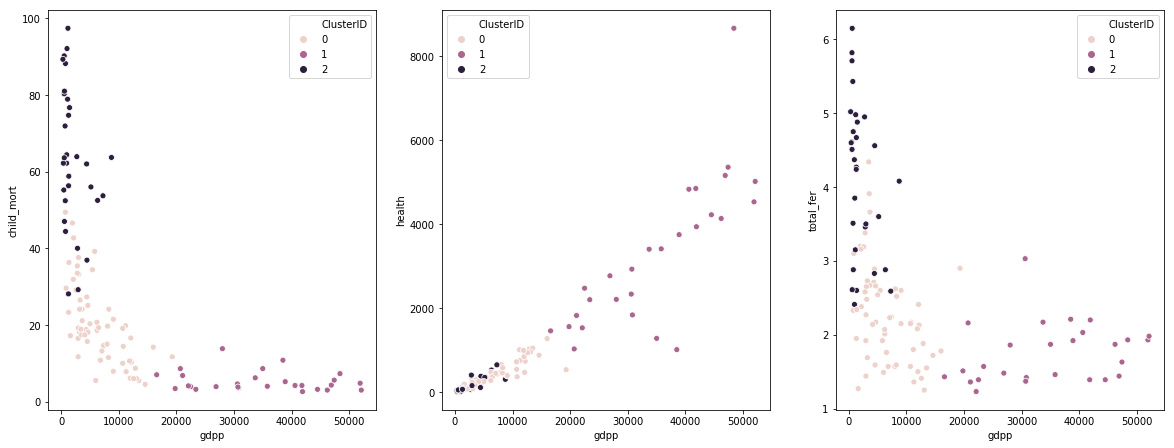

In [50]:
#Plotting the sctterplot to check the relationship of child_mort, health, total_fer wrt gdpp
plt.figure(figsize=(20, 25))

#plotting the clusters and checking for gdpp and child_mort
plt.subplot(3,3,1)
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterID',data=data6)

#plotting the clusters and checking for gdpp and health
plt.subplot(3,3,2)
sns.scatterplot(x='gdpp',y='health',hue='ClusterID',data=data6)

#plotting the clusters and checking for gdpp and total_fer
plt.subplot(3,3,3)
sns.scatterplot(x='gdpp',y='total_fer',hue='ClusterID',data=data6)

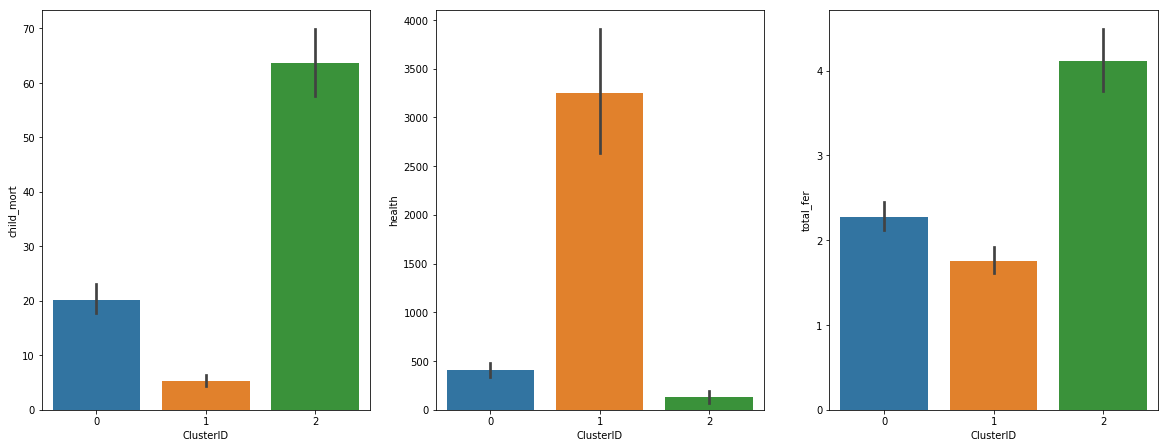

In [51]:
# Checking for cluster values of child_mort, health, total_fer
plt.figure(figsize=(20, 25))

#plotting the clusters values for child_mort
plt.subplot(3,3,1)
sns.barplot(x=data6.ClusterID,y=data6.child_mort)

#plotting the clusters values for health
plt.subplot(3,3,2)
sns.barplot(x=data6.ClusterID,y=data6.health)

#plotting the clusters values for total_fer
plt.subplot(3,3,3)
sns.barplot(x=data6.ClusterID,y=data6.total_fer)

In [73]:
#Bucketting the variables as per cluster values for K-Means Clustering
List_Of_Countries_KM=country_df[country_df['child_mort']>63.651613]
List_Of_Countries_KM=List_Of_Countries_KM[List_Of_Countries_KM['health']<= 128.778690]

In [74]:
#Top 10 countries which needs the max help from NGO as per child_mort, health and total_fer
List_Of_Countries_KM.sort_values(['child_mort', 'health'], ascending=[0, 0]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334


In [75]:
List_Of_Countries_KM.shape
#After analysis of the clusters and identify the ones which are in dire need of aid are 34 countries.

(34, 10)

## Hierarchical Clustering

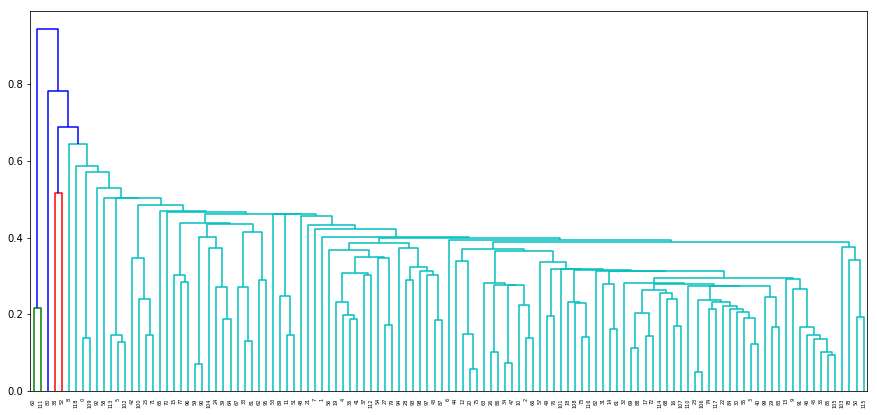

In [59]:
plt.figure(figsize = (15,7))
mergings = linkage(data3_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

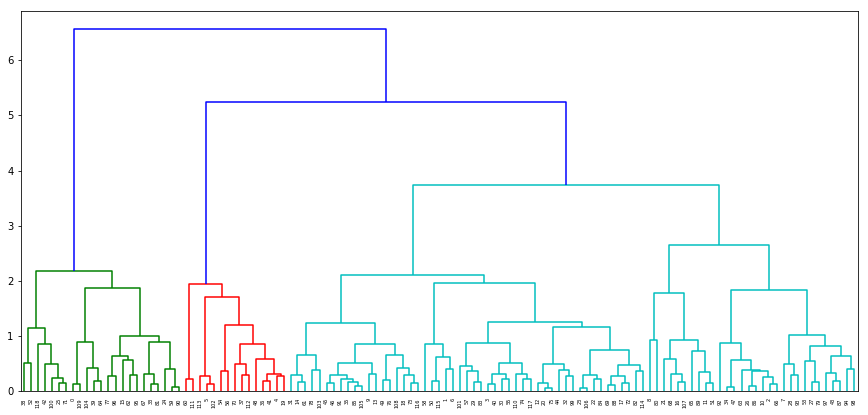

In [60]:
plt.figure(figsize = (15,7))
mergings = linkage(data3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [62]:
#Cutting the dendogram
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
data7=pcs_df2
data7.index = pd.RangeIndex(len(data7.index))
hc_data = pd.concat([data7, clusterCut], axis=1)
hc_data.columns = ['country','child_mort', 'health', 'total_fer','ClusterID']

In [63]:
hc_data.head()

,country,child_mort,health,total_fer,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,3


In [64]:
#Checking for the count in every cluster
hc_data['ClusterID'].value_counts()

1    51
2    30
0    23
3    15
Name: ClusterID, dtype: int64

In [67]:
#Merge the dataset with country and pc values with assign cluster
data8=pd.merge(country_df,hc_data,on='country')
data8=data8.drop(['health_y','total_fer_y','child_mort_y'],axis=1)

In [69]:
#Calculating the cluster means wrt to the various variables

HC_chi = pd.DataFrame(data8.groupby(["ClusterID"]).child_mort_x.mean())
HC_exp = pd.DataFrame(data8.groupby(["ClusterID"]).exports.mean())
HC_imp = pd.DataFrame(data8.groupby(["ClusterID"]).imports.mean())
HC_hea = pd.DataFrame(data8.groupby(["ClusterID"]).health_x.mean())
HC_inc = pd.DataFrame(data8.groupby(["ClusterID"]).income.mean())
HC_inf = pd.DataFrame(data8.groupby(["ClusterID"]).inflation.mean())         
HC_lif = pd.DataFrame(data8.groupby(["ClusterID"]).life_expec.mean())
HC_tot = pd.DataFrame(data8.groupby(["ClusterID"]).total_fer_x.mean())
HC_gdp = pd.DataFrame(data8.groupby(["ClusterID"]).gdpp.mean())

In [70]:
df_HC = pd.concat([pd.Series([0,1,2,3]),HC_chi,HC_exp,HC_imp,HC_hea,HC_inc,HC_inf,HC_lif,HC_tot,HC_gdp], axis=1)

In [71]:
df_HC.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income",
              "Inflation","Life_Expectancy","Total_Fertility","GDP"]
df_HC

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDP
0,0,68.478261,884.774513,838.634174,135.873852,4650.869565,10.711304,62.169565,4.507391,2152.739130
1,1,28.201961,1596.765853,1837.445119,244.705478,8350.392157,6.812569,71.576471,2.537843,4017.882353
2,2,8.650000,8168.105667,8053.445667,1298.511867,24883.333333,4.319367,76.510000,1.786667,17347.666667
3,3,5.173333,17256.080000,15558.526667,4132.270000,42853.333333,2.817467,80.486667,1.774000,42066.666667


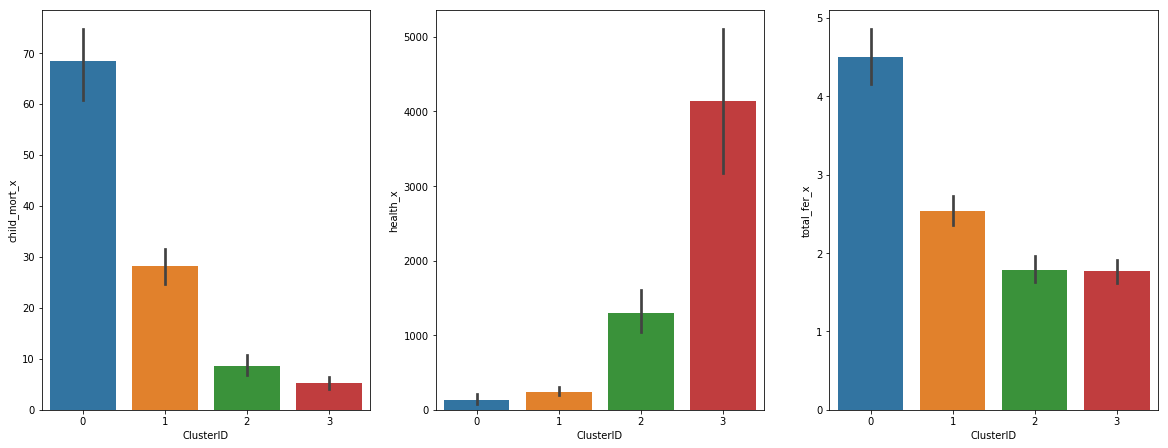

In [72]:
# Checking for cluster values of child_mort, health, total_fer
plt.figure(figsize=(20, 25))

#plotting the clusters values for child_mort
plt.subplot(3,3,1)
sns.barplot(x=data8.ClusterID,y=data8.child_mort_x)

#plotting the clusters values for health
plt.subplot(3,3,2)
sns.barplot(x=data8.ClusterID,y=data8.health_x)

#plotting the clusters values for total_fer
plt.subplot(3,3,3)
sns.barplot(x=data8.ClusterID,y=data8.total_fer_x)

In [76]:
#Bucketting the variables as per cluster values for Hierarchical Clustering
List_Of_Countries_HC=country_df[country_df['child_mort']>68.478261]
List_Of_Countries_HC=List_Of_Countries_HC[List_Of_Countries_HC['health']<= 135.873852]

In [77]:
List_Of_Countries_HC.sort_values(['child_mort', 'health'], ascending=[0, 0]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334
